# This is a Data Exploration Notebook

### Import libraries for your data exploration

In [1]:
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

import seaborn as sns
from numpy import median
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from platform_sdk.dataset_reader import DatasetReader
from datetime import date
dataset_reader = DatasetReader(PLATFORM_SDK_CLIENT_CONTEXT, dataset_id="5dd2ee272a371e18a8fa7ebd")
df0 = dataset_reader.limit(200000).read()
df0.head()

,--aepTenantId--.acctnumber,--aepTenantId--.prodcategory,--aepTenantId--.qty,--aepTenantId--.salesamount,--aepTenantId--.pricemethod,timestamp
0,C1030752,Baby Food,1,10,Discount,2018-09-13T00:00:00
1,C1030752,Baby Food,1,16,Discount,2018-09-13T00:00:00
2,C1030752,Cheese,2,11,Discount,2018-09-13T00:00:00
3,C1030752,Baby Food,1,9,Discount,2018-09-13T00:00:00
4,C1030752,Baby Food,1,14,Discount,2018-09-13T00:00:00


### Check the shape of the data - number of records and number of columns

In [3]:
df0.shape

(200000, 6)

### Check columns of your data

In [4]:
df0.columns

Index(['--aepTenantId--.acctnumber', '--aepTenantId--.prodcategory',
       '--aepTenantId--.qty', '--aepTenantId--.salesamount',
       '--aepTenantId--.pricemethod', 'timestamp'],
      dtype='object')

In [5]:
df0.dtypes

--aepTenantId--.acctnumber      object
--aepTenantId--.prodcategory    object
--aepTenantId--.qty              int64
--aepTenantId--.salesamount      int64
--aepTenantId--.pricemethod     object
timestamp                           object
dtype: object

### Summary Statistics

In [6]:
df0.describe()

,--aepTenantId--.qty,--aepTenantId--.salesamount
count,200000.000000,200000.00000
mean,2.362015,38.51036
std,13.131769,124.91911
min,-110.000000,-2307.00000
25%,1.000000,7.00000
50%,1.000000,16.00000
75%,2.000000,37.00000
max,3000.000000,14022.00000


### Unique accounts

In [7]:
df0['--aepTenantId--.acctnumber'].nunique()

714

### Lets look at some visualizations

## Number of Orders across Product Category

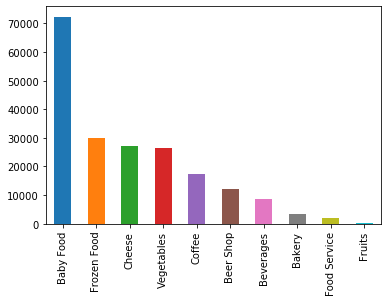

In [8]:
df0['--aepTenantId--.prodcategory'].value_counts()[:10].plot(kind='bar')

## Number of Orders across Price Method

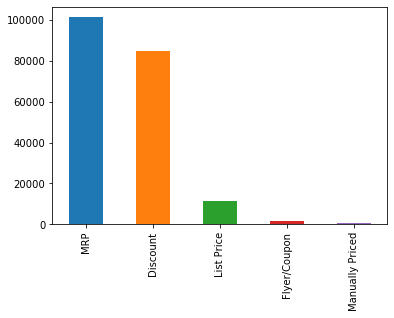

In [9]:
df0['--aepTenantId--.pricemethod'].value_counts()[:10].plot(kind='bar')

## Timeperiod split Criteria

In [10]:
df0['timestamp'] = df0['timestamp'].astype('datetime64[ns]')
df0['Invoice_Month'] = df0['timestamp'].dt.month

In [11]:
df0['Invoice_Month'].value_counts()

9     29822
10    17595
1     17484
8     15924
4     15679
11    15574
5     15552
3     15515
2     15002
7     14337
6     14181
12    13335
Name: Invoice_Month, dtype: int64

In [12]:
df0.loc[(df0['Invoice_Month'] <= 8) ,'Timeperiod'] = '1'
df0.loc[(df0['Invoice_Month'] > 8) ,'Timeperiod'] = '2'

In [13]:
df0['Timeperiod'].value_counts()

1    123674
2     76326
Name: Timeperiod, dtype: int64

## Orders across timeperiods

Drop from T1 to T2 : 38.284522211620875 %


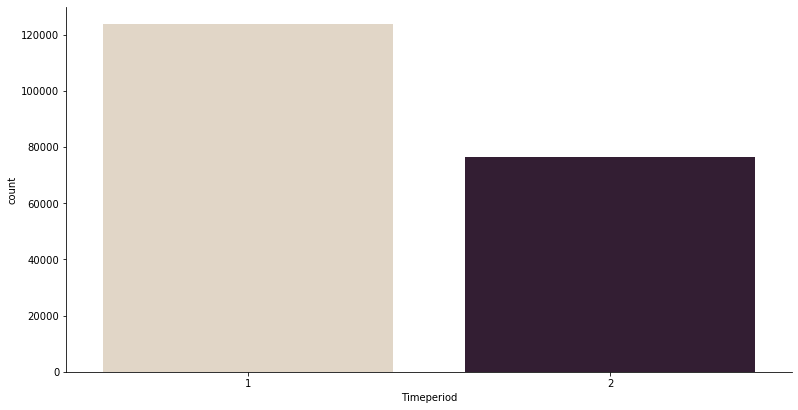

In [14]:
print ('Drop from T1 to T2 : ' + str((100 - float(100*df0[df0['Timeperiod']=='2']['--aepTenantId--.acctnumber'].count()/df0[df0['Timeperiod']=='1']['--aepTenantId--.acctnumber'].count()))) + ' %')

sns.catplot(x="Timeperiod", kind="count", palette="ch:.25", height=5.8, aspect=11/5.8, data=df0)


Revenue Drop from T1 to T2 : 38.963757566405924 %


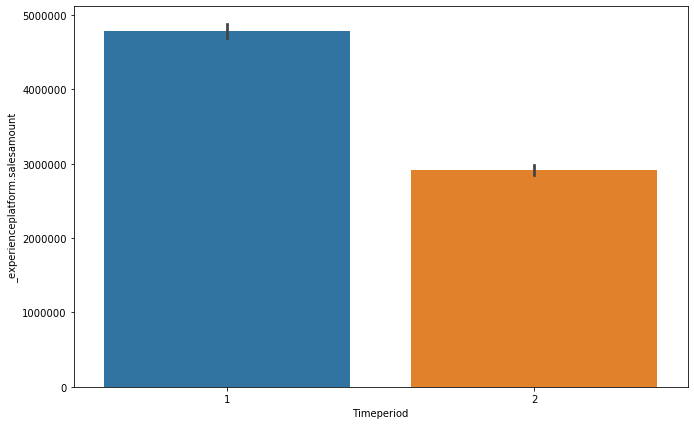

In [15]:
print ('Revenue Drop from T1 to T2 : ' + str((100 - float(100*df0[df0['Timeperiod']=='2']['--aepTenantId--.salesamount'].sum()/df0[df0['Timeperiod']=='1']['--aepTenantId--.salesamount'].sum()))) + ' %')
fig = plt.gcf()
fig.set_size_inches( 11, 7)
ax = sns.barplot(x="Timeperiod", y="--aepTenantId--.salesamount", estimator=sum, data=df0)